In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/problem-2/CC_y_Train.csv
/kaggle/input/problem-2/CC_X_Test.csv
/kaggle/input/problem-2/CC_X_Train.csv


# Problem # 2

In [2]:
# Problem # 2

In [3]:
# Reading data
y_train = pd.read_csv('/kaggle/input/problem-2/CC_y_Train.csv')
x_test =  pd.read_csv('/kaggle/input/problem-2/CC_X_Test.csv')
x_train = pd.read_csv('/kaggle/input/problem-2/CC_X_Train.csv')

# 1) Creating a predictoin Model

** Data Exploration**

In [4]:
x_train.describe()
#y_train.describe()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000
mean,13999.500000,14000.500000,167096.417143,1.604571,1.845893,1.556500,35.380107,-0.010536,-0.130179,-0.163357,...,4.702455e+04,43220.946036,40386.537429,38901.941750,5579.651643,5.847178e+03,5131.053321,4813.178143,4755.246964,5183.890429
std,8083.048105,8083.048105,129741.056051,0.488951,0.785917,0.521293,9.276097,1.122961,1.194749,1.195262,...,6.916944e+04,64234.541799,60758.881975,59434.604397,15162.109473,2.105092e+04,16606.096620,15307.079342,14887.417542,17602.698567
min,0.000000,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6999.750000,7000.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,...,2.755500e+03,2376.500000,1798.500000,1266.750000,1000.000000,8.390000e+02,390.000000,294.000000,264.000000,109.000000
50%,13999.500000,14000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,...,2.023950e+04,19129.000000,18238.500000,17211.500000,2100.000000,2.007500e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,20999.250000,21000.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54386.500000,50149.750000,49162.750000,5005.000000,5.000000e+03,4500.000000,4010.000000,4026.250000,4000.000000
max,27999.000000,28000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,417990.000000,528666.000000


In [5]:
x_train.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,20000.0,2,2,1,24,2,2,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,1,2,120000.0,2,2,2,26,-1,2,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,2,3,90000.0,2,2,2,34,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,3,4,50000.0,2,2,1,37,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,4,5,50000.0,1,2,1,57,-1,0,-1,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [6]:
##Data checks: Nulls, counts, types
x_train.info()
y_train.info()
#x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28000 non-null  int64  
 1   ID          28000 non-null  int64  
 2   LIMIT_BAL   28000 non-null  float64
 3   SEX         28000 non-null  int64  
 4   EDUCATION   28000 non-null  int64  
 5   MARRIAGE    28000 non-null  int64  
 6   AGE         28000 non-null  int64  
 7   PAY_0       28000 non-null  int64  
 8   PAY_2       28000 non-null  int64  
 9   PAY_3       28000 non-null  int64  
 10  PAY_4       28000 non-null  int64  
 11  PAY_5       28000 non-null  int64  
 12  PAY_6       28000 non-null  int64  
 13  BILL_AMT1   28000 non-null  float64
 14  BILL_AMT2   28000 non-null  float64
 15  BILL_AMT3   28000 non-null  float64
 16  BILL_AMT4   28000 non-null  float64
 17  BILL_AMT5   28000 non-null  float64
 18  BILL_AMT6   28000 non-null  float64
 19  PAY_AMT1    28000 non-nul

# Notes
* **Education, Sex and Marriage are categorical variables. Check Labels***
* **Educatoin : 5,6 are unknown, check counts**
* **PAY_n: 0 is an unlabelled value, If -1 is pay duly and 1 is payment after 1 month. What is 0? Circle back**
* **BILL_AMT_n: Negative values could suggest Credit towards the customer. Check for values paayments against such months**

In [7]:
x_train['EDUCATION'].value_counts()

2    13123
1     9951
3     4505
5      251
4      109
6       47
0       14
Name: EDUCATION, dtype: int64

Adding Unknown values to 'Others'

In [8]:
fil = (x_train['EDUCATION'] == 5) | (x_train['EDUCATION'] == 6) | (x_train['EDUCATION'] == 0)
x_train.loc[fil, 'EDUCATION'] = 4
x_train['EDUCATION'].value_counts()

2    13123
1     9951
3     4505
4      421
Name: EDUCATION, dtype: int64

In [9]:
# Repeat for test
fil = (x_test['EDUCATION'] == 5) | (x_test['EDUCATION'] == 6) | (x_test['EDUCATION'] == 0)
x_test.loc[fil, 'EDUCATION'] = 4
x_test['EDUCATION'].value_counts()

2    907
1    634
3    412
4     47
Name: EDUCATION, dtype: int64

Repeat for Other variables

In [10]:
x_train['MARRIAGE'].value_counts()

2    15028
1    12623
3      301
0       48
Name: MARRIAGE, dtype: int64

In [11]:
fil = (x_train['MARRIAGE'] == 5) | (x_train['MARRIAGE'] == 6) | (x_train['MARRIAGE'] == 0)
x_train.loc[fil, 'MARRIAGE'] = 4
x_train['MARRIAGE'].value_counts()

2    15028
1    12623
3      301
4       48
Name: MARRIAGE, dtype: int64

# Using the labelling given to change the Categorical feautures

In [12]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = x_train[categorical_features]
df_cat['Default'] = y_train['default.payment.next.month']
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'High school', 4 : 'others'},
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [13]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Default
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0


# Some simple Visualisations to get ahndle on data

<Figure size 720x360 with 0 Axes>

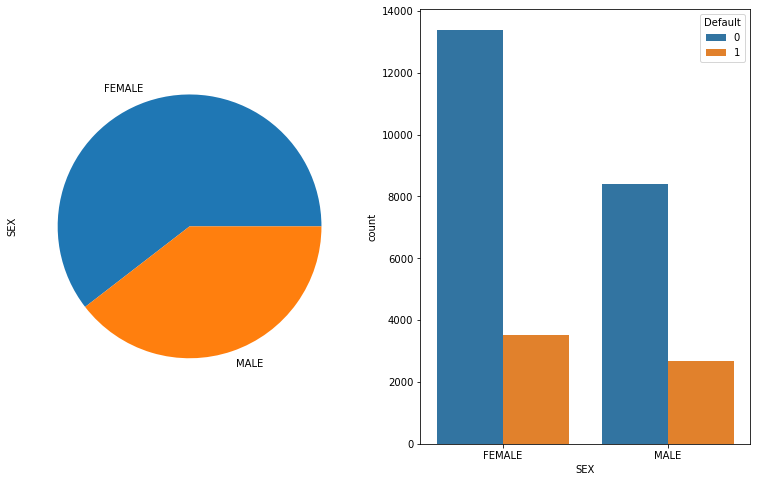

<Figure size 720x360 with 0 Axes>

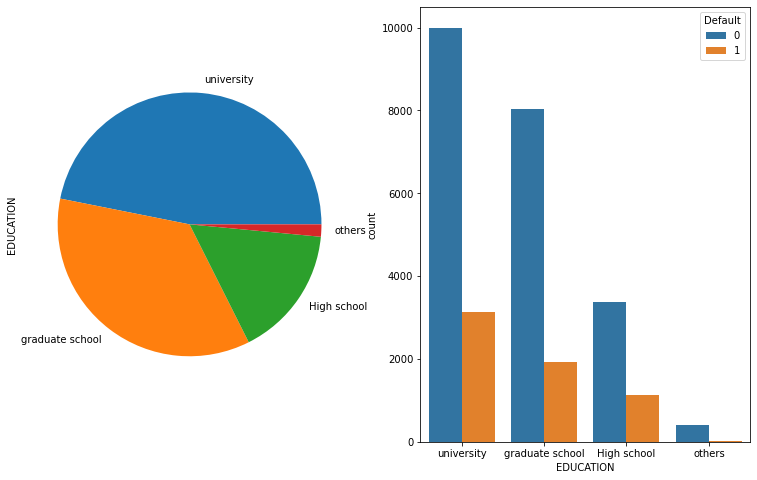

<Figure size 720x360 with 0 Axes>

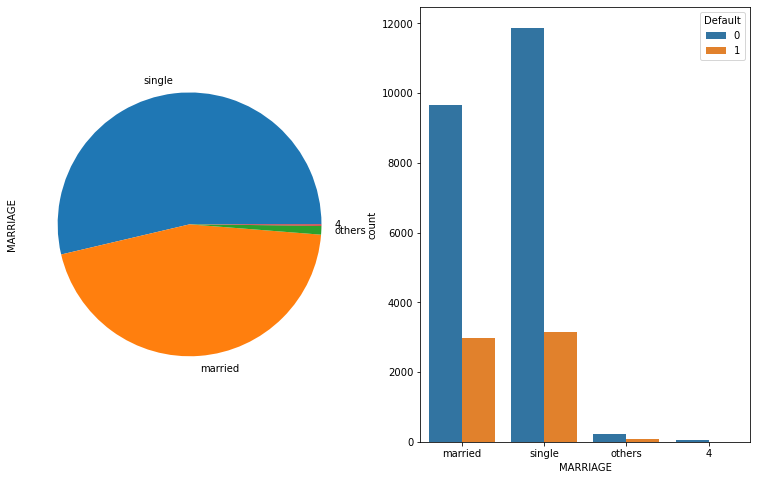

In [14]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df_cat[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Default', data = df_cat)

Observations:
*     There are Females than Males, However the respective default rate looks similar bewtween them

# Lets look at Other varaibles

In [15]:
def draw_histograms(x_train, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        x_train[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

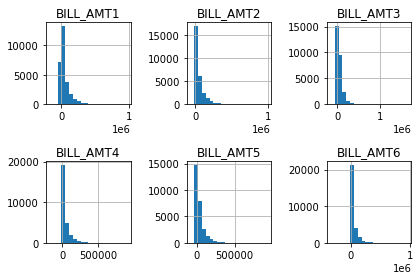

In [16]:
bill = x_train[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bill, bill.columns, 2, 3, 20)

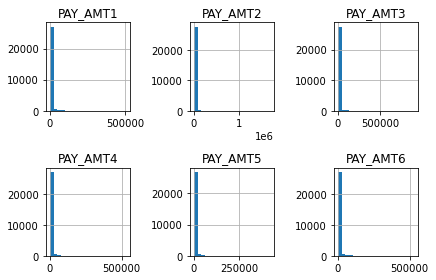

In [17]:
pay = x_train[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

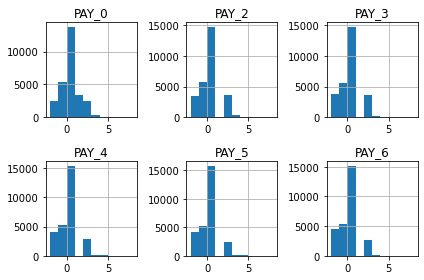

In [18]:
late = x_train[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

# PAY_AMT_n, BILL_AMT_n are heavily skewed with outliers
# PAY_n has anamalous values -2,-1 and 0. Lets fix them as we did with education

In [19]:
fil = (x_train.PAY_0 == -2) | (x_train.PAY_0 == -1) | (x_train.PAY_0 == 0)
x_train.loc[fil, 'PAY_0'] = 0
fil = (x_train.PAY_2 == -2) | (x_train.PAY_2 == -1) | (x_train.PAY_2 == 0)
x_train.loc[fil, 'PAY_2'] = 0
fil = (x_train.PAY_3 == -2) | (x_train.PAY_3 == -1) | (x_train.PAY_3 == 0)
x_train.loc[fil, 'PAY_3'] = 0
fil = (x_train.PAY_4 == -2) | (x_train.PAY_4 == -1) | (x_train.PAY_4 == 0)
x_train.loc[fil, 'PAY_4'] = 0
fil = (x_train.PAY_5 == -2) | (x_train.PAY_5 == -1) | (x_train.PAY_5 == 0)
x_train.loc[fil, 'PAY_5'] = 0
fil = (x_train.PAY_6 == -2) | (x_train.PAY_6 == -1) | (x_train.PAY_6 == 0)
x_train.loc[fil, 'PAY_6'] = 0

In [20]:
#Repeat for X_test
fil = (x_test.PAY_0 == -2) | (x_test.PAY_0 == -1) | (x_test.PAY_0 == 0)
x_test.loc[fil, 'PAY_0'] = 0
fil = (x_test.PAY_2 == -2) | (x_test.PAY_2 == -1) | (x_test.PAY_2 == 0)
x_test.loc[fil, 'PAY_2'] = 0
fil = (x_test.PAY_3 == -2) | (x_test.PAY_3 == -1) | (x_test.PAY_3 == 0)
x_test.loc[fil, 'PAY_3'] = 0
fil = (x_test.PAY_4 == -2) | (x_test.PAY_4 == -1) | (x_test.PAY_4 == 0)
x_test.loc[fil, 'PAY_4'] = 0
fil = (x_test.PAY_5 == -2) | (x_test.PAY_5 == -1) | (x_test.PAY_5 == 0)
x_test.loc[fil, 'PAY_5'] = 0
fil = (x_test.PAY_6 == -2) | (x_test.PAY_6 == -1) | (x_test.PAY_6 == 0)
x_test.loc[fil, 'PAY_6'] = 0

# Lets Try to fit a model to see how it performs and if we need further Feature Engineering especially on Numerical Features

**Chossing to run a Decision Tree owing to previous experience in Trees giving a good Accuracy**

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
# create the features, which now will be everything in the original df
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = x_train[features].copy()
Y = y_train['default.payment.next.month'].copy()

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [24]:
print(Y_train.describe())
#print("---------------------------")
print(Y_test.describe())

count    21000.000000
mean         0.223190
std          0.416395
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64
count    7000.000000
mean        0.217571
std         0.412624
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default.payment.next.month, dtype: float64


In [25]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=3, random_state=19) 
# training the classifier
classifier.fit(X_train, Y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = Y_test, y_pred = predictions)

0.8205714285714286

# we can use this model to predict the x_test

In [26]:
X_test_feat = x_test[features].copy()
prediction_test = classifier.predict(X_test_feat)

# An accuracy of 0.82% is impressive wihtout any feature engineering
# A tree depth of 3 implies an issue. Check variable important and other metrics

In [27]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, features)

,feat,score
5,PAY_0,0.761301
6,PAY_2,0.158613
19,PAY_AMT3,0.048007
10,PAY_6,0.016066
11,BILL_AMT1,0.012797
15,BILL_AMT5,0.003216
13,BILL_AMT3,0.000000
21,PAY_AMT5,0.000000
20,PAY_AMT4,0.000000
18,PAY_AMT2,0.000000


In [28]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5477
           1       0.66      0.36      0.47      1523

    accuracy                           0.82      7000
   macro avg       0.75      0.65      0.68      7000
weighted avg       0.80      0.82      0.80      7000



# The F1 score and other metric reveal the model is not good in predicting a default as it is predicting a non-default customer
# and that it is only taking into account a few features as indicative in the variable importance

***In the interest of time: I am not improving the model right now but potential boost can be feature enginering and removing outliers in the numerical features such Billed amount
Ensemble model can be beneficial. We can use Random Forest and LightGM which are good binary classifiers***

# 2) suggest improvements to the train-test split

* Consider time-based splitting: The data has a time-based component, We should consider using a time-based splitting method, such as time series cross-validation or temporal holdout, to evaluate your model's performance.
* Stratified sampling: In this scenario, the data is split based on the class distribution. This is especially important in imbalanced datasets, where one class may dominate the other classes. The train-test split must maintain the same class distribution as the original data. The default rate was ~22%, If a model hard codes a no default. Its accuracy is already at 78%.
* Cross-validation: Data can be split into several folds. The model can be trained on different folds and tested on the remaining fold. This can helps to reduce the variance of the model's performance.